<a href="https://colab.research.google.com/github/Afina78/Netology/blob/main/end__python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Имеем два категориальнвх столбца и восемь числовых, пропусков в данных нет.

In [ ]:
df.duplicated().sum() # посмотрим на наличие дубликатов


3008

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

Как таковых дубликатов нет, имеющих для анализа значение.

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Уровень удовлетворенности работой в среднем 0,6, максимальный 1, минимальный 0,09.

Время с момента последней оценки (предполагаю аттестацию, поддтверждение квалификации) в среднем 0,7 лет, максимальное 1 год, минимальное 0,4.  Количество проектов за время работы, минимум 2, максимум 7, в среднем 3,8.

В среднем сотрудники проводят на работе 201 час в месяц (если предположить что в стандарте 8 часовой рабочий день и 22 дня рабочих, можно сделать вывод что есть сотрудники которые работают сверх нормы, либо по сменам.) Максимальное среднее количество часов в месяц 310, минимальное 96.

Стаж работы в среднем 3,5 года, минимум 2 года, максимум 10 лет.

Уровень несчастных случаев не велик, это либо супер техника безопасности либо офисная работа.

Увольнение так же низкие средняя и максимум, если участь что имеются данные максимальном стаже сотрудника 10 лет то скорее всего данные представлены не менее чем за десятилетний период и количество увольнений достаточно низкое. Хотя здесь нужно так же взять во внимание штат сотрудников.

 Повышения за последние пять лет  в среднем показатель очень маленький, максимум стоставляет 1. Это либо отсутсвие текучки и расширение штата либо правила какие-то компании.


Посмотрим на распределение категориальных данных.

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

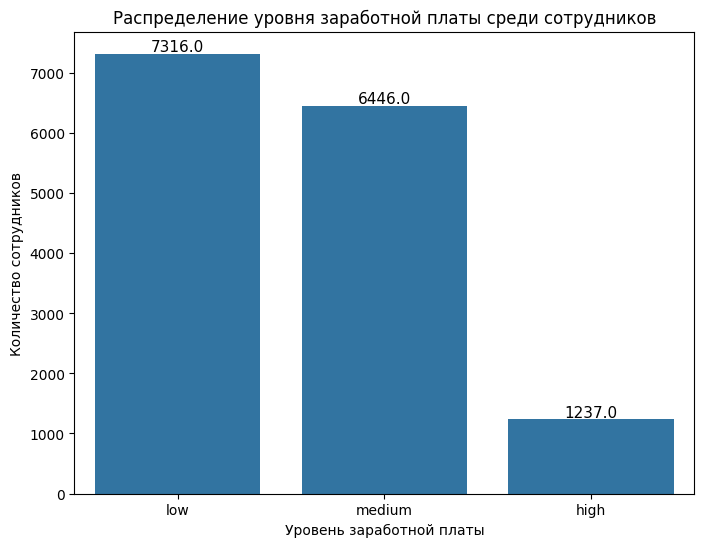

In [ ]:
# Построение графика распределения уровня заработной платы
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='salary', data=df, order=['low', 'medium', 'high'])
plt.title('Распределение уровня заработной платы среди сотрудников')
plt.xlabel('Уровень заработной платы')
plt.ylabel('Количество сотрудников')

# Добавление подписей к количеству сотрудников на графике
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Очень большое количество сотрудников с низкой заработной платой, чуть меньше со средней, и совсем не много с высокой.

Теперь исключим уволившихся сотрудников

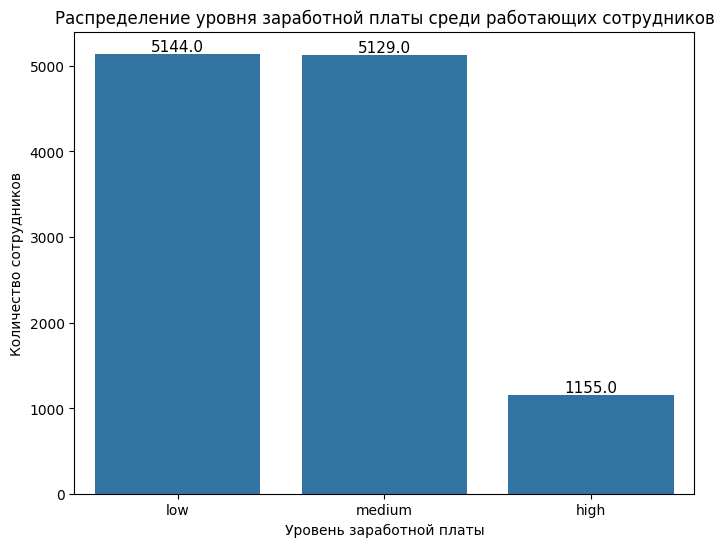

In [ ]:
# Исключение уволившихся сотрудников
df_active = df[df['left'] == 0]

# Построение графика распределения уровня заработной платы
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='salary', data=df_active, order=['low', 'medium', 'high'])
plt.title('Распределение уровня заработной платы среди работающих сотрудников')
plt.xlabel('Уровень заработной платы')
plt.ylabel('Количество сотрудников')

# Добавление подписей к количеству сотрудников на графике
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Среди оставшихся в компании сотрудников, распределение ЗРП выглядит иначе, превалирующее большинство получет низкую и среднюю зарабоную плату и лишь небольшое количество сотрудников высокую.

Посмторим как распределяются сотрудники по департаментам.

In [ ]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<ipython-input-12-5f62ffdc88f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['department'].value_counts(), y=df['department'].value_counts().index, palette='coolwarm')


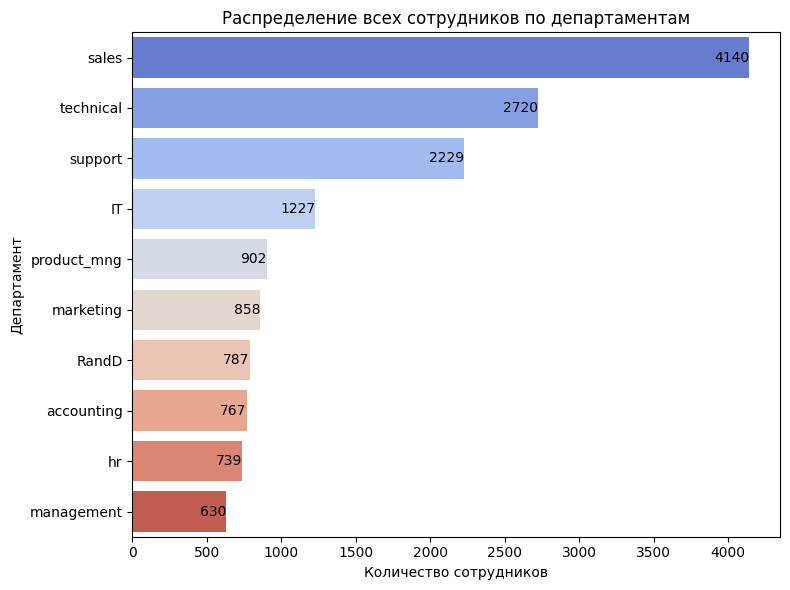

In [ ]:
# Построение графика распределения всех сотрудников по департаментам
plt.figure(figsize=(8, 6))
sns.barplot(x=df['department'].value_counts(), y=df['department'].value_counts().index, palette='coolwarm')
plt.title('Распределение всех сотрудников по департаментам')
plt.xlabel('Количество сотрудников')
plt.ylabel('Департамент')
# Добавление подписей к данным по количеству сотрудников
for index, value in enumerate(df['department'].value_counts()):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [ ]:
# Расчёт количества всех сотрудников в каждом департаменте
department_counts = df['department'].value_counts()

department_counts

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Наибольшее количество сотрудников занимается продажами, на втором месте технические специалисты, на третьем поддержка, четвертое IT-специалисты, приблизительно одинаковое количество продуктовых менеджеров, маркетологов и исследователей-разработчиков, и замыкает круг бухгалтерия и специалисты по кадрам.

Теперь посмотрим то же распределение, но исключим уволившихся сотрудников.

In [ ]:
# Фильтрация датасета, чтобы оставить только сотрудников, которые не уволились
current_employees = df[df['left'] == 0]

# Подсчет количества сотрудников в каждом департаменте
employees_per_department = current_employees['department'].value_counts()

# Вывод результатов
print("Количество сотрудников, работающих в каждом департаменте:")
employees_per_department

Количество сотрудников, работающих в каждом департаменте:


sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

<ipython-input-15-279f08b3d95b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='department', data=employees_per_department, palette='coolwarm')


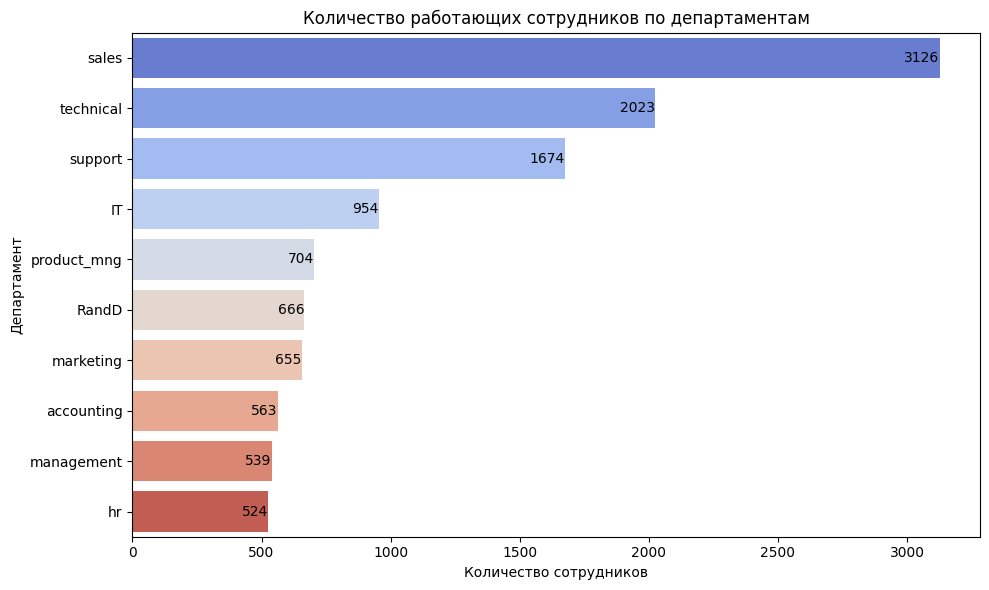

In [ ]:
# Подсчет количества работающих сотрудников в каждом департаменте
employees_per_department = current_employees['department'].value_counts().reset_index()
employees_per_department.columns = ['department', 'count']

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='department', data=employees_per_department, palette='coolwarm')
plt.title('Количество работающих сотрудников по департаментам')
plt.xlabel('Количество сотрудников')
plt.ylabel('Департамент')
# Добавление подписей к данным по количеству сотрудников
for index, value in enumerate(employees_per_department['count']):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Среди работающих сотрудников у нас произошли некоторые изменения в распределении между департаментами, в частности маркетологи и исследователи-разработчики , специалисты по кадрам и менеджеры,  для удобства и более наглядного представления построим график в разрезе департаментов по работающим и уволившимся сотрудникам.

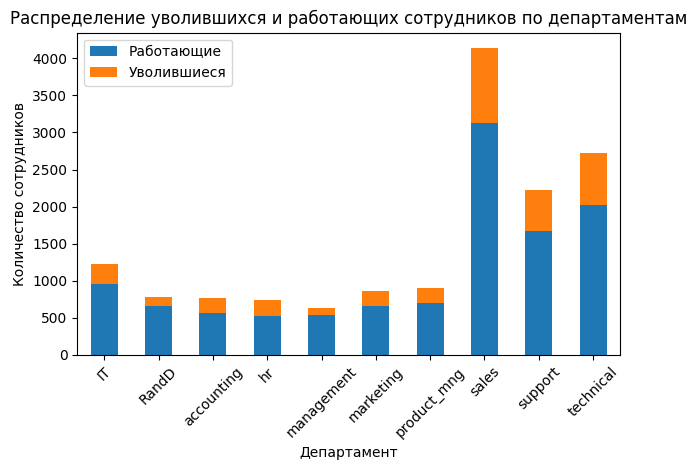

In [ ]:
# Группировка данных по департаменту и статусу увольнения
grouped = df.groupby(['department', 'left']).size().unstack()

# Построение графика
grouped.plot(kind='bar', stacked=True)
plt.title('Распределение уволившихся и работающих сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.legend(['Работающие', 'Уволившиеся'])
plt.tight_layout()
plt.show()

Наблюдаем наибольшую текучку кадров среди продажников, на втором месте технические специалисты, на третьем специалисты поддержки и замыкает четверку IT, далее следуют остальные департаменты

Посмотрим на распределение заработных плат по департаментам.

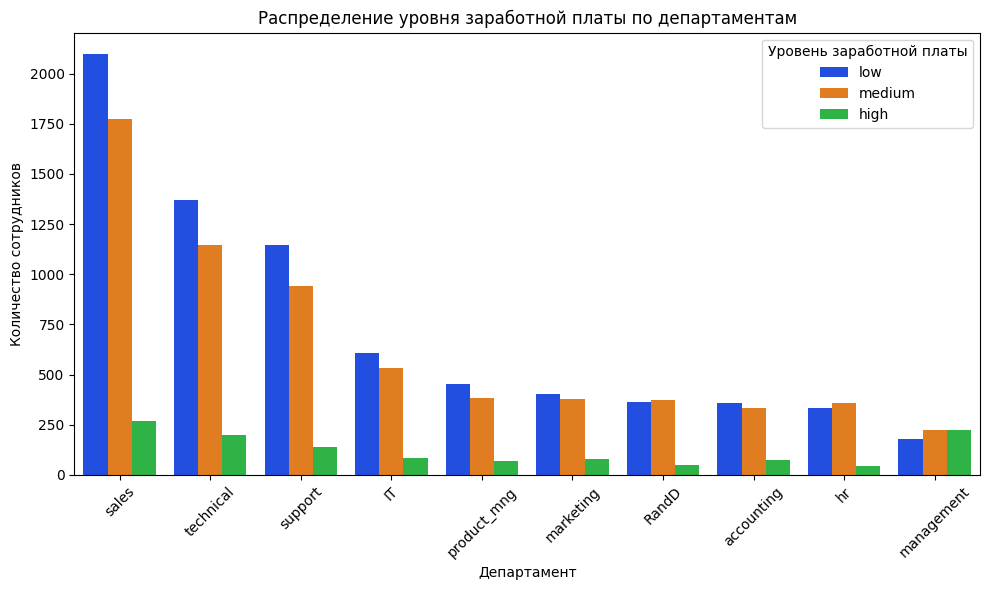

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='salary', data=df, palette='bright', order = df['department'].value_counts().index)
plt.title('Распределение уровня заработной платы по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45) # Поворот меток на оси X для лучшей читаемости
plt.legend(title='Уровень заработной платы')
plt.tight_layout() # Автоматическая корректировка подписей, чтобы они не перекрывались

plt.show()

Наибольшее количество низкооплачиваемых сотрудников и со средней заработной платой в продажах, среди технических специалистов и специалистов поддержки. Большая доля высокоопалчиаемых сотрудников в продажах, менеджеров и технических специалистов.

Посмотрим распределение заработных плат по работающим сотрудникам.

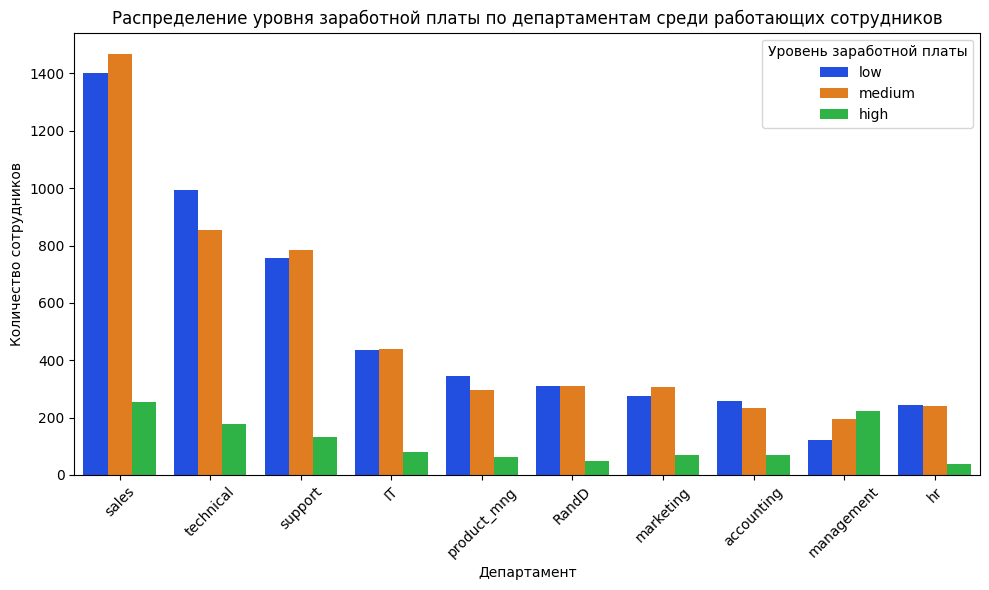

In [ ]:
# Фильтрация датасета для анализа только работающих сотрудников
df_working = df[df['left'] == 0]

# Построение графика
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='salary', data=df_working, palette='bright', order=df_working['department'].value_counts().index)
plt.title('Распределение уровня заработной платы по департаментам среди работающих сотрудников')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45) # Поворот меток на оси X для лучшей читаемости
plt.legend(title='Уровень заработной платы')
plt.tight_layout() # Автоматическая корректировка подписей, чтобы они не перекрывались

plt.show()

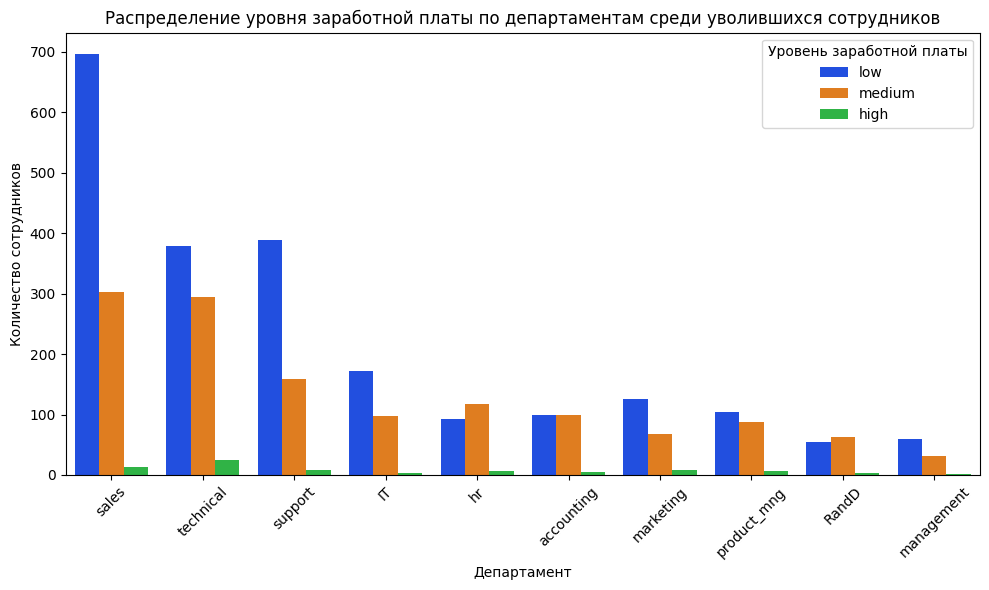

In [ ]:
# Фильтрация датасета для анализа только уволившихся сотрудников
df_working = df[df['left'] != 0]

# Построение графика
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='salary', data=df_working, palette='bright', order=df_working['department'].value_counts().index)
plt.title('Распределение уровня заработной платы по департаментам среди уволившихся сотрудников')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45) # Поворот меток на оси X для лучшей читаемости
plt.legend(title='Уровень заработной платы')
plt.tight_layout() # Автоматическая корректировка подписей, чтобы они не перекрывались

plt.show()

Из графиков можно сделать вывод что наибольший отток сотрудников с низкой заработной платой, в основном это продажи, технические специалисты и специалисты поддержки. Среди специалистов по кадрам наблюдается больший отток сотрудников со средней заработной платой. Среди бухгалтеров в равных долях увольнялись сотрудники с низкой и средней заработной платой. Наибольшее количество уволившихся сотрудников с высокой заработной платой в бухгалтерии.

Посмтрим на конкретные цифры

In [ ]:
# 1. Частота (Количество)
frequency = df.groupby(['department', 'salary']).size().reset_index(name='count')

# 2. Относительная частота (Процент)
total_counts = df.groupby('department').size()
frequency['percentage'] = frequency.apply(lambda row: (row['count'] / total_counts[row['department']]) * 100, axis=1)

# 3. Мода
mode = df.groupby('department')['salary'].agg(lambda x: x.value_counts().index[0]).reset_index(name='mode')

# 4. Разброс
unique_values = df.groupby('department')['salary'].nunique().reset_index(name='spread')

# 5. Сводная таблица (кросс-таблица)
cross_table = pd.crosstab(df['department'], df['salary'])

print("Частота (Количество):")
print(frequency)
print("\nОтносительная частота (Процент):")
print(frequency)
print("\nМода:")
print(mode)
print("\nРазброс:")
print(unique_values)
print("\nСводная таблица (кросс-таблица):")
print(cross_table)

Частота (Количество):
     department  salary  count  percentage
0            IT    high     83    6.764466
1            IT     low    609   49.633252
2            IT  medium    535   43.602282
3         RandD    high     51    6.480305
4         RandD     low    364   46.251588
5         RandD  medium    372   47.268107
6    accounting    high     74    9.647979
7    accounting     low    358   46.675359
8    accounting  medium    335   43.676662
9            hr    high     45    6.089310
10           hr     low    335   45.331529
11           hr  medium    359   48.579161
12   management    high    225   35.714286
13   management     low    180   28.571429
14   management  medium    225   35.714286
15    marketing    high     80    9.324009
16    marketing     low    402   46.853147
17    marketing  medium    376   43.822844
18  product_mng    high     68    7.538803
19  product_mng     low    451   50.000000
20  product_mng  medium    383   42.461197
21        sales    high    269  

Расчитаем основные статистики для числовых данных и построим графики для наглядности. Дополним ранее полученные данные в .describe  модой и дисперсией

In [ ]:
# Выполнение расчётов
descriptive_stats = df.describe().transpose()  # Получение описательной статистики

# Дополнительный расчет моды для каждого столбца, т.к. describe() моду не включает
mode = df.mode().loc[0]

# Расчёт дисперсии для каждого столбца
variance = df.var()

# Добавление моды к описательной статистике
descriptive_stats['mode'] = mode

# Добавление дисперсии к описательной статистике
descriptive_stats['variance'] = variance

# выведем результат
descriptive_stats


<ipython-input-20-6069c79f6a65>:8: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


,count,mean,std,min,25%,50%,75%,max,mode,variance
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.1,0.061817
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.55,0.029299
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,4.0,1.519284
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,135,2494.313175
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,3.0,2.131998
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,0.0,0.123706
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,0.0,0.181411
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,0.0,0.020817


Посмотрим на наличие выбросов

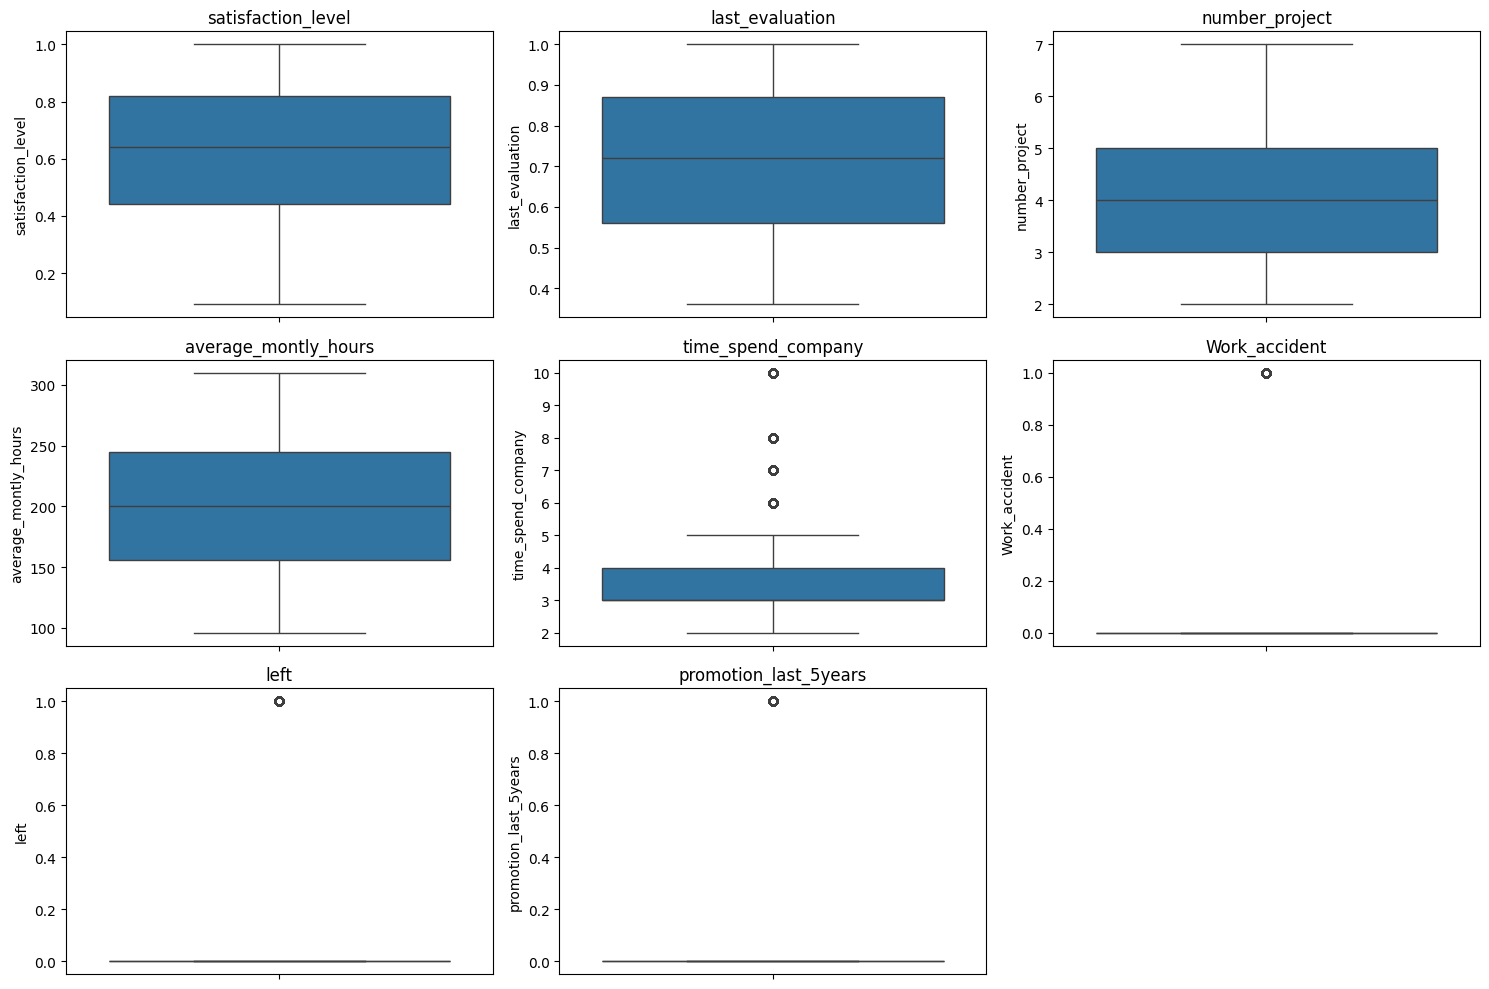

In [ ]:
df1 = df.drop(['department', 'salary'], axis=1) # удалим категориальные данные
# построим боксплоты
plt.figure(figsize=(15, 10))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df1, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Выбросы есть в данных по стажу работы в годах, несчастные случаи. Увольнения и повышения, скорее редкость для данной компании , поэтому графики по данным колонкам неинформативны.

Посмотрим как коррелируют числовые данные между собой

<ipython-input-22-790d1753895c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


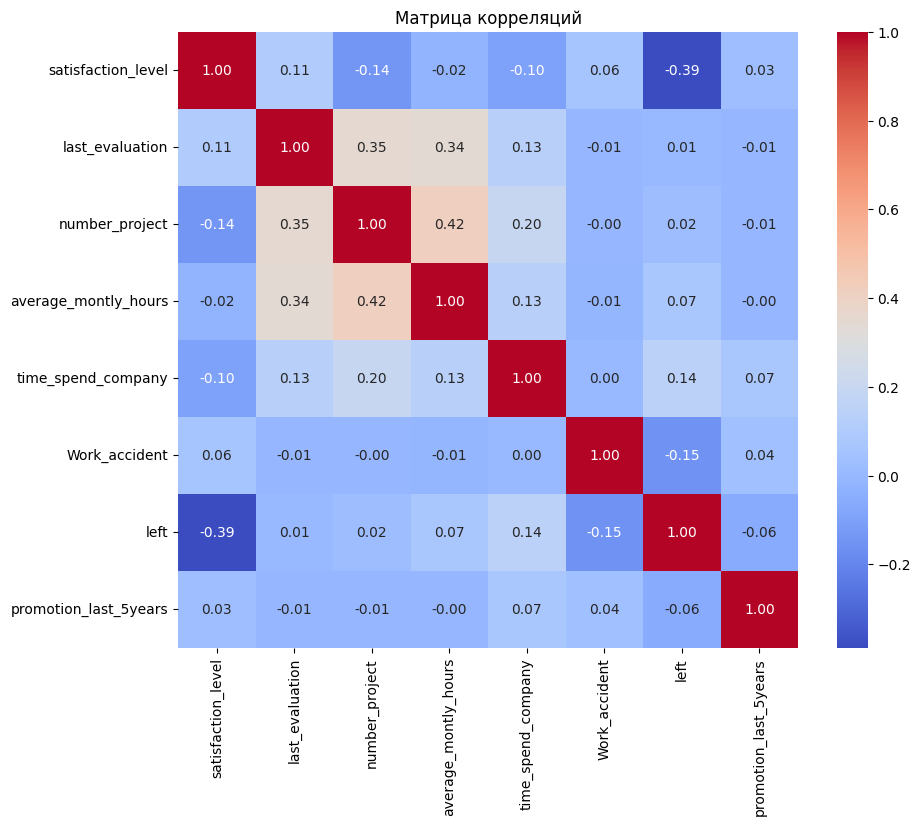

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Самые положительно коррелирующие категории (т.е. с ростом одной переменной растет вторая):

количество проектов выполненных за время работы и среднее  количество часов на рабочем месте в месяц (0,42),

чуть меньше корреляция между количеством выполнненых проектов за время работы и временм с последней оценки (0,35)

Самые отрицательно коррелирующие категории (т.е. со снижением одной переменной растет вторая):

увольнение и удовлетворенность работой (-0,39)

несчастные случаи и увольнение (-0,15)

Отсутсвует корреляция между:

стажем работы и несчастными случаями (0,00)

увольнением и временем последней оценки

Категорий с ярковыраженной корреляцией нет.

Проверим гипотезу, что сотрудники с высокой зарплатой проводят на работе больше времени чем сотрудники с низкой зарплатой (Н0).

Н1 - сотрудники с высокой зарплатой не задерживаются на работе.

In [ ]:
from scipy import stats

In [ ]:
# Разделение данных по уровню заработной платы
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']

In [ ]:
# Проведение теста Левена на равенство дисперсий
stat, p = stats.levene(low_salary_hours, high_salary_hours)

print(f"Статистика Левена: {stat}, p-value: {p}")
# Тест Левена на равенство дисперсий
if p > 0.05:
    print("Не отвергаем нулевую гипотезу о равенстве дисперсий.")
else:
    print("Отвергаем нулевую гипотезу о равенстве дисперсий.")

Статистика Левена: 21.773972194444223, p-value: 3.113962257119499e-06
Отвергаем нулевую гипотезу о равенстве дисперсий.


In [ ]:
# Проведение t-теста Уэлча для сравнения средних (используется для неравных дисперсий, equal_var=False)
t_stat, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours, equal_var=False)
# Для одностороннего теста p-value нужно разделить пополам, поскольку scipy возвращает значение для двустороннего теста
p_value_one_sided = p_value / 2
print(f"T-statistic: {t_stat}, One-sided P-value: {p_value_one_sided}")

# Интерпретация результатов
if t_stat > 0 and p_value_one_sided < 0.05:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые доказательства того, что сотрудники с высоким окладом проводят на работе меньше времени.")
else:
    print("Не отвергаем нулевую гипотезу: нет достаточных доказательств, что сотрудники с высоким окладом проводят на работе меньше времени, чем с низким.")


T-statistic: -0.7624331665385475, One-sided P-value: 0.22295227711289445
Не отвергаем нулевую гипотезу: нет достаточных доказательств, что сотрудники с высоким окладом проводят на работе меньше времени, чем с низким.


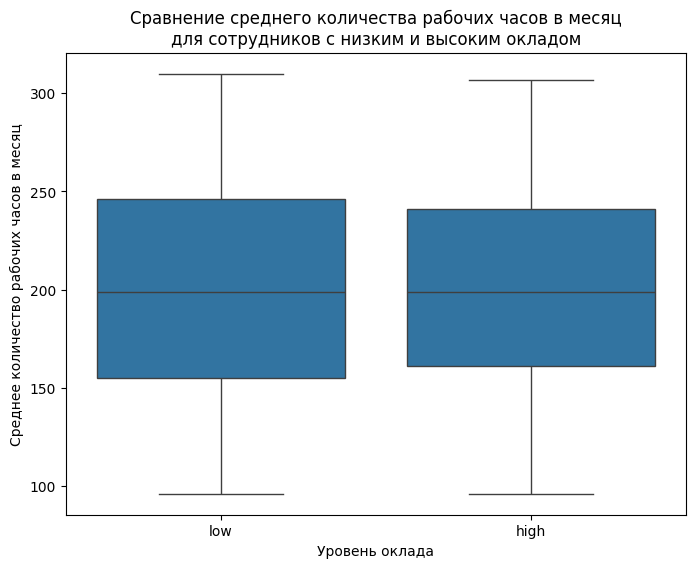

In [ ]:
# Визуализация
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', y='average_montly_hours', data=df, order=['low', 'high'])
plt.title('Сравнение среднего количества рабочих часов в месяц\nдля сотрудников с низким и высоким окладом')
plt.xlabel('Уровень оклада')
plt.ylabel('Среднее количество рабочих часов в месяц')
plt.show()

Можно сделать вывод что сотрудники с высоким и низким окладом незначительно отличаются по среднему времени проведенному на рабочем месте. при этом медианные значания одинаковы (приблизительно).

Определим среднюю степень удовлетворенности работой среди уволившихся и продолжающих работать сотрудников.

In [ ]:
# Группировка данных по статусу увольнения и расчет среднего значения удовлетворенности
average_satisfaction = df.groupby('left')['satisfaction_level'].mean()

print(f"Степень удовлетворенности уволившихся сотрудников - {average_satisfaction[1]:.2f}")
print(f"Степень удовлетворенности продолжающих работать сотрудников - {average_satisfaction[0]:.2f}")

Степень удовлетворенности уволившихся сотрудников - 0.44
Степень удовлетворенности продолжающих работать сотрудников - 0.67


Определим среднее количество проектов среди уволившихся и продолжающих работать сотрудников.

In [ ]:
average_projects = df.groupby('left')['number_project'].mean()

print(f"Среднее количество проектов среди уволившихся сотрудников: {average_projects[1]:.2f}")
print(f"Среднее количество проектов среди не уволившихся сотрудников: {average_projects[0]:.2f}")

Среднее количество проектов среди уволившихся сотрудников: 3.86
Среднее количество проектов среди не уволившихся сотрудников: 3.79


Определим долю сотрудников с повышением за последние пять лет среди уволившихся и работающих сотрудников.

In [ ]:
# Разделение на уволившихся и работающих сотрудников
left_df = df[df['left'] == 1]
working_df = df[df['left'] == 0]

# Определение доли сотрудников с повышением за последние пять лет
left_promotion_rate = left_df['promotion_last_5years'].mean()
working_promotion_rate = working_df['promotion_last_5years'].mean()

print("Доля сотрудников с повышением за последние пять лет среди уволившихся:", left_promotion_rate)
print("Доля сотрудников с повышением за последние пять лет среди работающих:", working_promotion_rate)

Доля сотрудников с повышением за последние пять лет среди уволившихся: 0.005320638476617194
Доля сотрудников с повышением за последние пять лет среди работающих: 0.026251312565628283


Так как доля повышений незначительная, можно предположить что карьерный рост крайне сложный вопрос в данной компании, учитывая то, что доля проектов среди уволившихся сотрудников немного выше чем у продолжающих работать. Предположу что компании необходимо стимлировать работников выполняющих проекты и занимающих активную позицию в рабочем процессе, что позволит снизить отток инициативных и перспективных кадров. Необходимо еще учитывать заработную плату в разрезе департаментов среди уволившихся сотрудников, возможно причиной уволнения послужила низкая заработная плата.

Построим модель LDA (линейный дискриминантный анализ), предсказывающую уволился ли сотрудник на основе имеющихся числовых переменных. Выше мы уже создали датасет без категориальных данных df1, используем его для моделирования.

In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


Посмотрим как распределены данные, так как у нас выборка из большого количества данных используем для определения нормальности QQ-графики

In [ ]:
import scipy.stats as stats

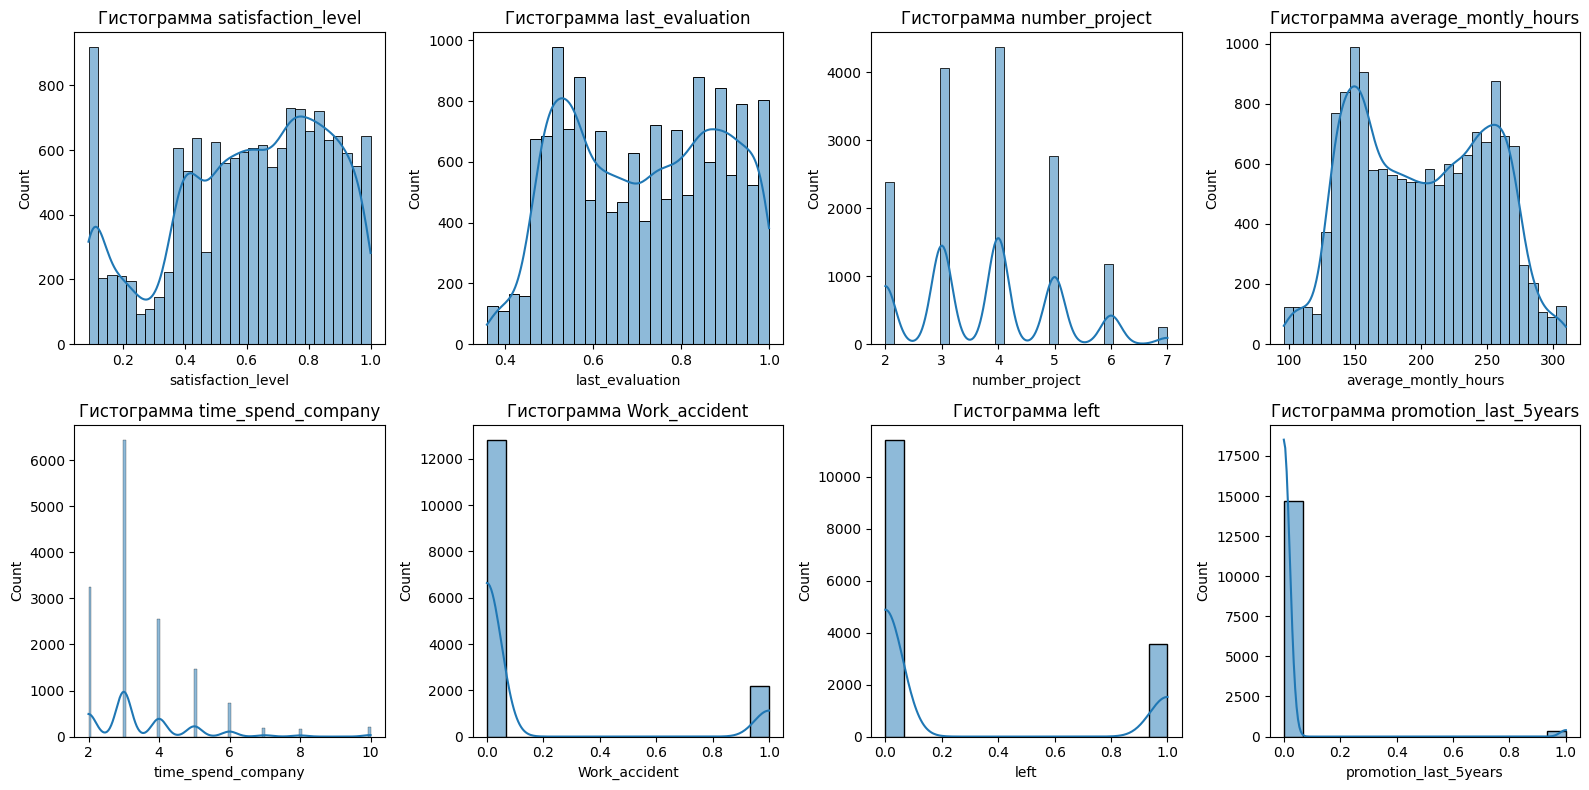

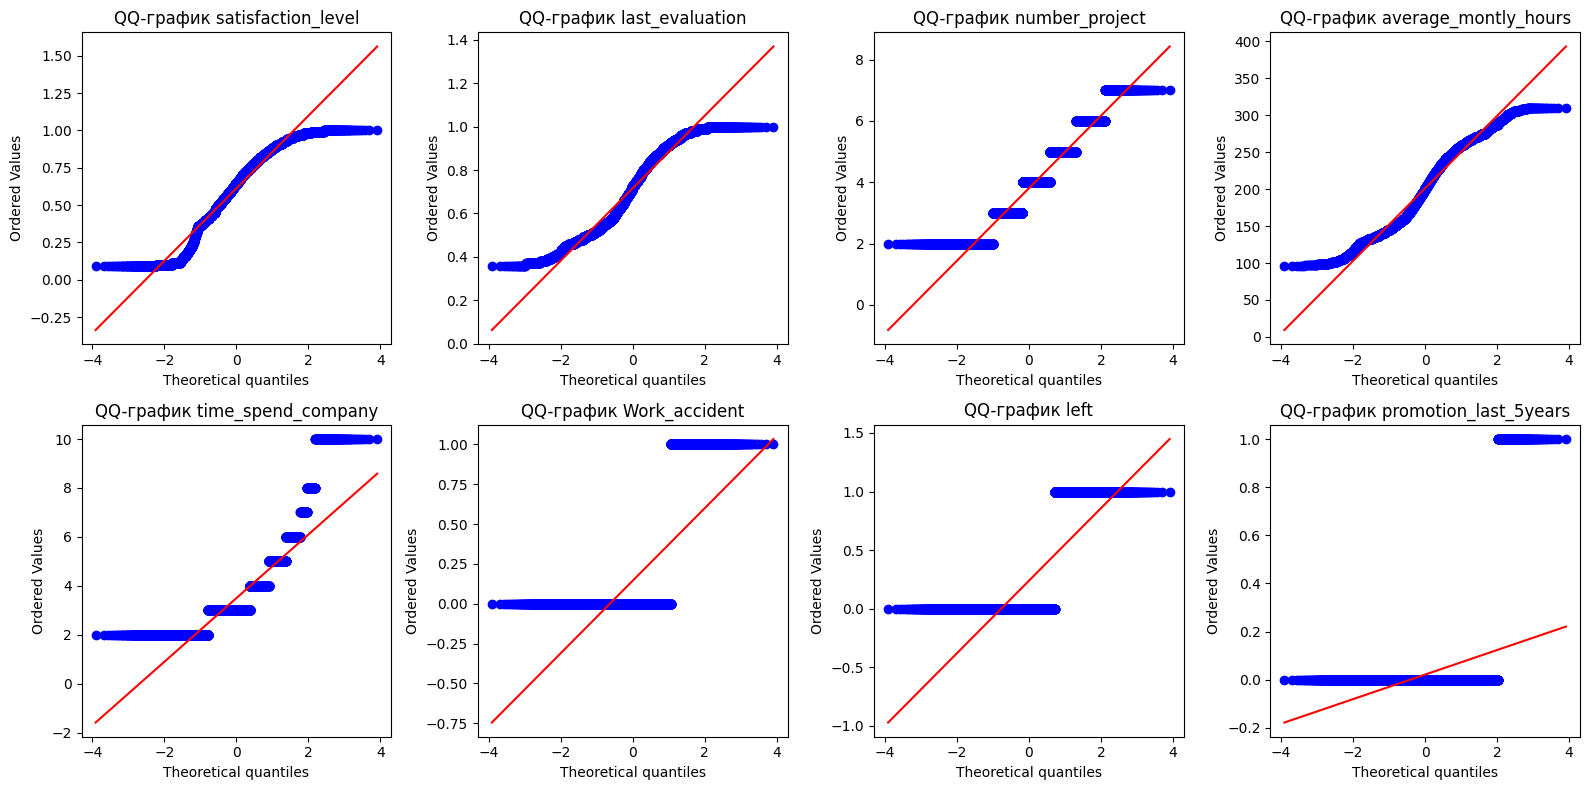

In [ ]:
# Список числовых столбцов, для которых нужно построить графики
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_montly_hours', 'time_spend_company', 'Work_accident',
                   'left', 'promotion_last_5years']

# Размеры графиков
plt.figure(figsize=(16, 8))

# Цикл для построения гистограмм и QQ-графиков для каждого числового столбца
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Гистограмма {column}')

plt.tight_layout()
plt.show()

# Размеры графиков
plt.figure(figsize=(16, 8))

# Цикл для построения QQ-графиков для каждого числового столбца
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    stats.probplot(df1[column], dist="norm", plot=plt)
    plt.title(f'QQ-график {column}')

plt.tight_layout()
plt.show()

Все наши данные не имеют нормального распределния

Сначала нормализуем и стандартизируем данные.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Создание экземпляра объекта MinMaxScaler для нормализации
min_max_scaler = MinMaxScaler()

# Создание экземпляра объекта StandardScaler для стандартизации
standard_scaler = StandardScaler()

# Применение нормализации и стандартизации к данным
normalized_data = min_max_scaler.fit_transform(df1)
normalized_standardized_data = standard_scaler.fit_transform(normalized_data)

# Преобразование в DataFrame
normalized_standardized_df = pd.DataFrame(normalized_standardized_data, columns=df1.columns)

normalized_standardized_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1.788917,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1.788917,-0.147412


Разделим данные на две выборки, целевую переменную возьмем из исходного датасета df, все остальные из подготовленных данных normalized_standardized_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = normalized_standardized_df.drop('left', axis=1)
y = df['left']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающего и тестового наборов
print("Размер обучающего набора:", X_train.shape[0])
print("Размер тестового набора:", X_test.shape[0])

Размер обучающего набора: 11999
Размер тестового набора: 3000


In [ ]:
# Создание модели LDA
lda_model = LinearDiscriminantAnalysis()

# Обучение модели на обучающем наборе
lda_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_lda = lda_model.predict(X_test)

# Оценка точности модели
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Точность модели LDA (Accuracy):", accuracy_lda)

Точность модели LDA (Accuracy): 0.7533333333333333


In [ ]:
# Точность модели
precision_lda = precision_score(y_test, y_pred_lda)
print("Точность (Precision):", precision_lda)

# Полнота модели
recall_lda = recall_score(y_test, y_pred_lda)
print("Полнота (Recall):", recall_lda)

# F1-мера
f1_lda = f1_score(y_test, y_pred_lda)
print("F1-мера:", f1_lda)

# Матрица ошибок
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Матрица ошибок:\n", conf_matrix_lda)

Точность (Precision): 0.453551912568306
Полнота (Recall): 0.23512747875354106
F1-мера: 0.30970149253731344
Матрица ошибок:
 [[2094  200]
 [ 540  166]]


Показатели точности модели низкие.

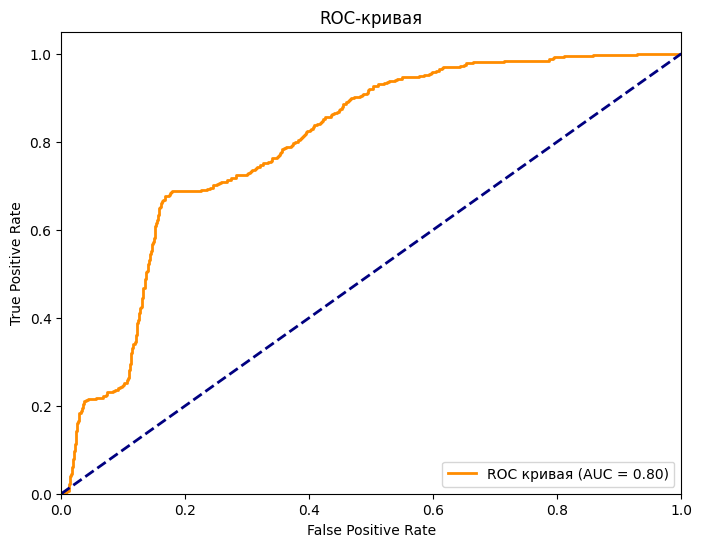

In [ ]:
from sklearn.metrics import roc_curve, auc

# Вычисление FPR, TPR и пороговых значений
fpr, tpr, thresholds = roc_curve(y_test, lda_model.predict_proba(X_test)[:,1])

# Вычисление AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Точность данной модели показывает что всего 45 % прогнозов корректны в части прогнозирования увольнения сотрудников, полнота 23,5 - модель выявляет лиш 1/4 часть реальных случаев увольнения, F1 0,3 модель плохо справляется с прогнозом с классификацией данному набору. Матрица ошибок показывает что модель лучше справляется с определением отрицательных результатов - не уволился, и допускает количество ложно отрицательных ошибок - 540, т.е. предсказывает что не уволится, а на самом деле увольняется.

Для сравнения построим модель на простых данных без нормализации и стандартизации и посмотрим на ее результаты.

In [ ]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(['left', 'department' , 'salary'], axis=1)
y = df['left']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающего и тестового наборов
print("Размер обучающего набора:", X_train.shape[0])
print("Размер тестового набора:", X_test.shape[0])

Размер обучающего набора: 11999
Размер тестового набора: 3000


In [ ]:
# Создание модели LDA
lda_model = LinearDiscriminantAnalysis()

# Обучение модели на обучающем наборе
lda_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_lda = lda_model.predict(X_test)

# Оценка точности модели
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Точность модели LDA (Accuracy):", accuracy_lda)

Точность модели LDA (Accuracy): 0.7533333333333333


чуть более 75% предсказанных значений на тестовой выборке сделаны правильно. Расчитаем другие критерии.

In [ ]:
# Точность модели
precision_lda = precision_score(y_test, y_pred_lda)
print("Точность (Precision):", precision_lda)

# Полнота модели
recall_lda = recall_score(y_test, y_pred_lda)
print("Полнота (Recall):", recall_lda)

# F1-мера
f1_lda = f1_score(y_test, y_pred_lda)
print("F1-мера:", f1_lda)

# Матрица ошибок
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Матрица ошибок:\n", conf_matrix_lda)

Точность (Precision): 0.453551912568306
Полнота (Recall): 0.23512747875354106
F1-мера: 0.30970149253731344
Матрица ошибок:
 [[2094  200]
 [ 540  166]]


Точность данной модели не изменилась.



Посмотрим как сбалансированы данные в нашей модели

In [ ]:
# Подсчет количества уволившихся и работающих сотрудников
num_left = df['left'].sum()  # сумма значений '1' (уволился)
num_stayed = df['left'].count() - num_left  # общее количество - количество уволившихся = количество оставшихся

# Процентное соотношение уволившихся и работающих сотрудников
percent_left = (num_left / (num_left + num_stayed)) * 100
percent_stayed = (num_stayed / (num_left + num_stayed)) * 100

print("Процент уволившихся сотрудников: {:.2f}%".format(percent_left))
print("Процент работающих сотрудников: {:.2f}%".format(percent_stayed))

Процент уволившихся сотрудников: 23.81%
Процент работающих сотрудников: 76.19%


точность модели Accuracy считалась на несбалансированных данных, поэтому ее достаточно не плохой показатель разница с остальными расчетами точности - Precision, Recall, F1.

применим кросс-валидацию и посмотрим какие параметры дает наша модель.

In [ ]:
from sklearn.model_selection import cross_val_score

# Создание модели LDA
lda_model = LinearDiscriminantAnalysis()

# Кросс-валидация
cv_scores = cross_val_score(lda_model, X, y, cv=5)  # cv=5 означает 5 фолдов для кросс-валидации

# Вывод результатов кросс-валидации
print("Результаты кросс-валидации:", cv_scores)
print("Средняя точность:", cv_scores.mean())

Результаты кросс-валидации: [0.76666667 0.76833333 0.77733333 0.76366667 0.61587196]
Средняя точность: 0.7383743914638214


попробуем использовать метод увеличения примеров меньшего класса -Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Применение oversampling к обучающему набору данных
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

In [ ]:
# Создание модели LDA
lda_model = LinearDiscriminantAnalysis()

# Обучение модели на обучающем наборе
lda_model.fit(X_train_balanced, y_train_balanced)

# Прогнозирование на тестовом наборе
y_pred_lda = lda_model.predict(X_test)

# Оценка точности модели
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Точность модели LDA (Accuracy):", accuracy_lda)

Точность модели LDA (Accuracy): 0.7426666666666667


In [ ]:
# Точность модели
precision_lda = precision_score(y_test, y_pred_lda)
print("Точность (Precision):", precision_lda)

# Полнота модели
recall_lda = recall_score(y_test, y_pred_lda)
print("Полнота (Recall):", recall_lda)

# F1-мера
f1_lda = f1_score(y_test, y_pred_lda)
print("F1-мера:", f1_lda)

# Матрица ошибок
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Матрица ошибок:\n", conf_matrix_lda)

Точность (Precision): 0.47150259067357514
Полнота (Recall): 0.773371104815864
F1-мера: 0.5858369098712447
Матрица ошибок:
 [[1682  612]
 [ 160  546]]


Мы улучшили показатель точности F1 с 0,3 до почти 0,6. Ошибочные показатели в матрице все еще велики

Попробуем применить метод комбинированный.

In [ ]:
from imblearn.combine import SMOTEENN

# Создание экземпляра SMOTEENN, который сочетает oversampling с помощью SMOTE и undersampling с помощью ENN
sampler = SMOTEENN(random_state=42)

# Применение комбинированного метода к обучающему набору данных
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

In [ ]:
# Создание модели LDA
lda_model = LinearDiscriminantAnalysis()

# Обучение модели на сбалансированных данных
lda_model.fit(X_train_balanced, y_train_balanced)

# Прогнозирование на тестовом наборе данных
y_pred_lda = lda_model.predict(X_test)

# Оценка точности модели
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Точность модели LDA (Accuracy):", accuracy_lda)

# Оценка точности (Precision)
precision_lda = precision_score(y_test, y_pred_lda)
print("Точность модели LDA (Precision):", precision_lda)

# Оценка полноты (Recall)
recall_lda = recall_score(y_test, y_pred_lda)
print("Полнота модели LDA (Recall):", recall_lda)

# Оценка F1-меры
f1_lda = f1_score(y_test, y_pred_lda)
print("F1-мера модели LDA:", f1_lda)

# Вывод матрицы ошибок
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Матрица ошибок:\n", conf_matrix_lda)

Точность модели LDA (Accuracy): 0.735
Точность модели LDA (Precision): 0.4623200677392041
Полнота модели LDA (Recall): 0.773371104815864
F1-мера модели LDA: 0.5786963434022258
Матрица ошибок:
 [[1659  635]
 [ 160  546]]


Комбинированный метод с уменьшением большей выборки и увеличением меньшей слабо эффективен. Посмотрим какие результаты даст модель бустинга.

In [ ]:
import xgboost as xgb

# Создание модели XGBoost
xgb_model = xgb.XGBClassifier()

# Обучение модели на обучающем наборе данных
xgb_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка точности модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Точность модели XGBoost (Accuracy):", accuracy_xgb)

# Оценка точности (Precision)
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Точность модели XGBoost (Precision):", precision_xgb)

# Оценка полноты (Recall)
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Полнота модели XGBoost (Recall):", recall_xgb)

# Оценка F1-меры
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1-мера модели XGBoost:", f1_xgb)

# Вывод матрицы ошибок
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Матрица ошибок для модели XGBoost:\n", conf_matrix_xgb)



Точность модели XGBoost (Accuracy): 0.988
Точность модели XGBoost (Precision): 0.9841040462427746
Полнота модели XGBoost (Recall): 0.9645892351274787
F1-мера модели XGBoost: 0.9742489270386266
Матрица ошибок для модели XGBoost:
 [[2283   11]
 [  25  681]]


Наиболее приемлемый вариант, классифицирует 98,8% правильно, Precision 98,4% предсказаний сотрудников покинувших компанию таковыми и являются на самом деле. полности 96% так же свидетельствует о правильном отнесении сотрудников к положительному классу. F1 составляет 97,4 % и говорит об очень хорошей сбалансированной оценки точности и полноты.

Матрица ошибок - 2283 случая классифицированы как оставшиеся сотрудники, и допущено 11 ошибок 681 сотрудник как уволившийся и 25 ошибок.